# ============================================
# 1. Wczytanie danych i podstawowa walidacja
# ============================================

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [58]:
# Ustawienia wyświetlania
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Ścieżka do danych
DATA_PATH = Path("data/zbiór_2.csv")  # <- zmień numer zbioru na swój

# Wczytanie danych
df = pd.read_csv(DATA_PATH)

print(f"✅ Wczytano dane: {df.shape[0]} wierszy, {df.shape[1]} kolumn")

# Podgląd danych
display(df.head())


✅ Wczytano dane: 3000 wierszy, 220 kolumn


,szczegolnaFormaPrawna_Symbol,formaWlasnosci_Symbol,pkdKod,wsk_liczba_dni_istnienia,Aktywa,Aktywa_trwale,Wartosci_niematerialne_prawne,Wartosc_firmy,Rzeczowe_aktywa_trwale,Srodki_trwale,Naleznosci_dlugoterminowe,Inwestycje_dlugoterminowe,Rozliczenia_miedzyokresowe_dlugie,Aktywa_obrotowe,Zapasy,Naleznosci_krotkoterminowe,Naleznosci_dostaw_uslug_12m_powiazane,Naleznosci_dostaw_uslug_pow12m_powiazane,Naleznosci_dostaw_uslug_12m_kapitale,Naleznosci_dostaw_uslug_pow12m_kapitale,Naleznosci_dostaw_uslug_12m_pozostale,Naleznosci_dostaw_uslug_pow12m_pozostale,Naleznosci_dostaw_uslug_pozostale_sadowe,Inwestycje_krotkoterminowe,Srodki_pieniezne,Rozliczenia_miedzyokresowe_krotkie,Kapital_wlasny,Kapital_podstawowy,Kapital_zapasowy,Zysk_netto,Zobowiazania_rezerwy,Rezerwy_na_zobowiazania,Rezerwa_z_tytulu_odroczonego_podatku_dochodowego,Rezerwa_na_swiadczenia_emerytalne,Rezerwa_na_swiadczenia_emerytalne_dlugie,Rezerwa_na_swiadczenia_emerytalne_krotkie,Pozostale_rezerwy,Pozostale_rezerwy_krotkie,Zobowiazania_dlugoterminowe,Kredyty_pozyczki_dlugie,Inne_zobowiazania_fin_dlugoterminowe,Zobowiazania_krotkoterminowe,Zobowiazania_dostaw_uslug_12m_powiazane,Zobowiazania_dostaw_uslug_pow12m_powiazane,Zobowiazania_dostaw_uslug_12m_kapitale,Zobowiazania_dostaw_uslug_pow12m_kapitale,Kredyty_pozyczki_krotkie,Inne_zobowiazania_fin_krotkoterminowe,Zobowiazania_dostaw_uslug_12m_pozostale,Zobowiazania_dostaw_uslug_pow12m_pozostale,...,wsk_rotacja_wartosci_niewaterialnych,wsk_rotacja_zapasow,wsk_rotacja_naleznosci,wsk_rotacja_naleznosci_dostaw_uslug,wsk_cykl_operacyjny,wsk_poziom_kosztow_operacyjnych,wsk_poziom_kosztow_finansowych,wsk_obrotowsci_naleznosci,wsk_rotacja_zobowiazan,wsk_rotacja_zobowiazan_dostaw_uslug,wsk_cykl_konwersji_gotowki,wsk_plynnosc_biez_1,wsk_plynnosc_biez_2,wsk_plynnosc_biez_3,wsk_plynnosc_szybka_1,wsk_plynnosc_szybka_2,wsk_plynnosc_gotowkowa_1,wsk_poziom_kapitalu_obrotowego_netto,wsk_udzial_kapitalu_obrotowego_netto,wsk_udzial_zob_biez_sprzedaz_1,wsk_udzial_zob_biez_sprzedaz_2,wsk_udzial_zob_biez_aktywa_1,wsk_udzial_zob_biez_aktywa_2,wsk_udzial_zapasy_zobowiazania,wsk_udzial_zapasy_kap_obrotowy,wsk_udzial_kap_obrotowego_w_fin,wsk_zysk_ebitda_1,wsk_zysk_ebitda_2,wsk_zysk_ebitda_3,wsk_zysk_CF_operacyjny,wsk_obrotowosc_gotowkowa,wsk_struktura_majatku,wsk_struktury_kapitalu,wsk_zast_kapitalu_wlasnego,wsk_zast_kapitalu_podstawowego,wsk_zast_kapitalu_stalego,wsk_zast_kapitalu_obcego,wsk_sytuacji_fin,wsk_struktura_kap_wlasnego_1,wsk_struktura_kap_wlasnego_2,wsk_struktura_kap_wlasnego_s_1,wsk_struktura_kap_wlasnego_s_2,wsk_zadluzenia,wsk_zob_dlugoterminowe_aktywa_rzeczowe,wsk_zob_oprocentowanych,wsk_zob_oprocentowanych_aktywa_rzeczowe,wsk_struktura_kap_obcego_s,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,default
0,117,224,4120,1501,667091.16,87750.43,0.0,0.0,87750.43,87750.43,0.0,0.0,0.0,579340.73,95439.45,339582.60,0.0,0.0,0.0,0.0,136778.56,0.0,0.0,133832.15,133832.15,10486.53,42678.00,5000.0,69329.33,-31651.33,624413.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19814.80,0.0,0.0,0.0,0.0,0.0,0.0,11318.44,0.0,...,4901.0225,70.883086,252.208731,101.585732,323.091816,1.065573,0.013784,1.443249,463.753003,8.406230,786.844820,0.927816,0.927816,0.471388,0.758175,1.142149,0.214333,-45072.43,-0.067566,1.274047,0.091965,0.936024,0.735403,0.152847,-2.117468,-0.103610,-0.492126,-0.492126,-0.564846,NaN,3.662067,0.151466,0.068349,0.486357,0.056980,0.486357,1.077800,0.451250,0.063976,0.063976,0.063976,0.080032,14.630797,0.000000,0.000000,0.000000,0.936024,0.735403,-0.077800,1
1,117,214,6820,1570,180157.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,180157.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,178957.00,180000.0,0.00,0.00,1200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,1801.570000,1801.570000,1801.570000,1801.570000,0.000000,180157.00,1.000000,0.000000,-1801.570000,0.000000,0.000000,0.000000,0.000000,18


--- Typy danych ---


szczegolnaFormaPrawna_Symbol                 int64
formaWlasnosci_Symbol                        int64
pkdKod                                       int64
wsk_liczba_dni_istnienia                     int64
Aktywa                                     float64
                                            ...   
wsk_zob_oprocentowanych_aktywa_rzeczowe    float64
wsk_struktura_kap_obcego_s                 float64
wsk_zob_s_aktywa_rzeczowe                  float64
wsk_fin_majatku_kapitalem                  float64
default                                      int64
Length: 220, dtype: object


--- Braki danych (%) ---


RP_przeplywy_operacyjne             98.733333
wsk_pokrycie_zob_kr_gotowkowe_2     98.733333
wsk_zadluzenia_gotowki_2            98.733333
wsk_akt_generowania_got_2           98.733333
wsk_pokrycie_wyd_fin_gotowkowe_2    98.733333
wsk_zysk_CF_operacyjny              98.733333
RP_amortyzacja                      95.200000
wsk_plynnosc_biez_1                  3.633333
wsk_kapital_do_aktywa                1.700000
wsk_struktura_kap_wlasnego_s_2       1.666667
dtype: float64


--- Target distribution ---


default
0    87.033333
1    12.966667
Name: proportion, dtype: float64

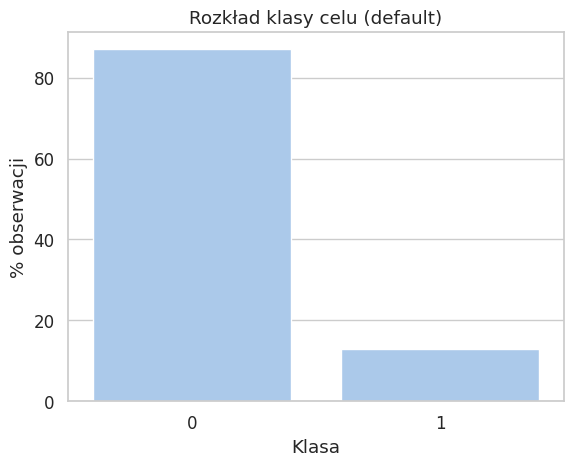

In [59]:
# ----------------------------
# Walidacja podstawowa
# ----------------------------

print("\n--- Typy danych ---")
display(df.dtypes)

print("\n--- Braki danych (%) ---")
missing = df.isna().mean().sort_values(ascending=False) * 100
display(missing.head(10))

# Histogram targetu
if "default" in df.columns:
    default_counts = df["default"].value_counts(normalize=True) * 100
    print("\n--- Target distribution ---")
    display(default_counts)
    sns.barplot(x=default_counts.index, y=default_counts.values)
    plt.title("Rozkład klasy celu (default)")
    plt.xlabel("Klasa")
    plt.ylabel("% obserwacji")
    plt.show()
else:
    print("⚠️ Brak kolumny 'default' — sprawdź nazwę celu w danych!")

In [60]:
# ----------------------------
# Sprawdzenie duplikatów
# ----------------------------
dupes = df.duplicated().sum()
print(f"Liczba duplikatów: {dupes}")

Liczba duplikatów: 0


# ============================================
# 2. Przygotowanie i EDA (Exploratory Data Analysis)
# ============================================

## ----------------------------------------------------
## 2.1. Kontrola jakości danych
## ----------------------------------------------------

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [62]:
# ----------------------------------------------------
# 2.1. Kontrola jakości danych
# ----------------------------------------------------

print("🔍 Data Quality Summary:")
print(f"Liczba obserwacji: {df.shape[0]}")
print(f"Liczba zmiennych: {df.shape[1]}")

🔍 Data Quality Summary:
Liczba obserwacji: 3000
Liczba zmiennych: 220


In [63]:
# Kolumny ze wszystkimi wartościami identycznymi
constant_cols = [c for c in df.columns if df[c].nunique() <= 1]
if constant_cols:
    print(f"⚠️ Kolumny o jednej wartości (nieinformatywne): {constant_cols}")
    df = df.drop(columns=constant_cols)

⚠️ Kolumny o jednej wartości (nieinformatywne): ['szczegolnaFormaPrawna_Symbol']


In [64]:
# Odsetek braków w kolumnach
missing = df.isna().mean().sort_values(ascending=False)
missing_df = missing.to_frame(name="% braków")
display(missing_df.head(15))

,% braków
RP_przeplywy_operacyjne,0.987333
wsk_zadluzenia_gotowki_2,0.987333
wsk_akt_generowania_got_2,0.987333
wsk_pokrycie_wyd_fin_gotowkowe_2,0.987333
wsk_pokrycie_zob_kr_gotowkowe_2,0.987333
wsk_zysk_CF_operacyjny,0.987333
RP_amortyzacja,0.952000
wsk_plynnosc_biez_1,0.036333
wsk_kapital_do_aktywa,0.017000
wsk_struktura_kap_wlasnego_s_2,0.016667


In [65]:
# Wyrzuć kolumny, które mają >90% braków
threshold = 0.9
cols_to_drop = missing[missing > threshold].index.tolist()
if cols_to_drop:
    print(f"❌ Usuwam kolumny z >60% braków: {cols_to_drop}")
    df = df.drop(columns=cols_to_drop)

❌ Usuwam kolumny z >60% braków: ['RP_przeplywy_operacyjne', 'wsk_zadluzenia_gotowki_2', 'wsk_akt_generowania_got_2', 'wsk_pokrycie_wyd_fin_gotowkowe_2', 'wsk_pokrycie_zob_kr_gotowkowe_2', 'wsk_zysk_CF_operacyjny', 'RP_amortyzacja']


In [66]:
# Odsetek braków w kolumnach (dla potwierdzenia)
missing = df.isna().mean().sort_values(ascending=False)
missing_df = missing.to_frame(name="% braków")
display(missing_df.head(5))

,% braków
wsk_plynnosc_biez_1,0.036333
wsk_kapital_do_aktywa,0.017000
wsk_struktura_kap_wlasnego_s_2,0.016667
formaWlasnosci_Symbol,0.000000
Aktywa_trwale,0.000000


In [67]:
# ----------------------------------------------------
# 2.1.1. Czyszczenie wartości INF / -INF (poprawione)
# ----------------------------------------------------
import numpy as np

print("🧹 Etap 2.1.1 — Wykrywanie i czyszczenie INF / -INF\n")

# Tylko kolumny liczbowe
num_df = df.select_dtypes(include=[np.number])

# Sprawdzenie, które kolumny mają wartości INF / -INF
inf_mask = np.isinf(num_df)
inf_cols = num_df.columns[inf_mask.any()].tolist()

if inf_cols:
    print(f"⚠️ Kolumny zawierające INF / -INF: {len(inf_cols)}")
    print(" - " + ", ".join(inf_cols[:10]) + (" ..." if len(inf_cols) > 10 else ""))

    # Zamiana INF / -INF na NaN (tylko w liczbowych kolumnach)
    df[inf_cols] = df[inf_cols].replace([np.inf, -np.inf], np.nan)
    print("✅ Wartości INF / -INF zostały zamienione na NaN.\n")
else:
    print("✅ Brak wartości INF / -INF w danych.\n")

🧹 Etap 2.1.1 — Wykrywanie i czyszczenie INF / -INF

⚠️ Kolumny zawierające INF / -INF: 3
 - wsk_kapital_do_aktywa, wsk_plynnosc_biez_1, wsk_struktura_kap_wlasnego_s_2
✅ Wartości INF / -INF zostały zamienione na NaN.



In [68]:
print("📉 Etap 2.1.2 — Wykrywanie i ograniczanie outlierów\n")

# Tylko kolumny liczbowe
num_cols_pre = df.select_dtypes(include=[np.number]).columns

# Diagnostyka (1%–99%)
desc = df[num_cols_pre].describe(percentiles=[0.01, 0.99]).T
desc["range"] = desc["99%"] - desc["1%"]

print("📊 Przykładowe zakresy 1%–99% (pierwsze 10 kolumn):")
display(desc[["mean", "std", "1%", "99%", "range"]].head(10))

# Przycięcie wartości spoza 1%–99% (winsoryzacja / capping)
for col in num_cols_pre:
    if df[col].dtype.kind in "if":  # tylko liczby
        low, high = df[col].quantile(0.01), df[col].quantile(0.99)
        df[col] = np.clip(df[col], low, high)

print("\n✅ Outliery zostały przycięte do przedziału 1%–99% wartości.")
print(f"📦 Aktualny rozmiar danych: {df.shape[0]:,} wierszy × {df.shape[1]:,} kolumn\n")

📉 Etap 2.1.2 — Wykrywanie i ograniczanie outlierów

📊 Przykładowe zakresy 1%–99% (pierwsze 10 kolumn):


,mean,std,1%,99%,range
formaWlasnosci_Symbol,2.008570e+02,5.187920e+01,0.00,2.270000e+02,2.270000e+02
pkdKod,5.357259e+03,2.011731e+03,111.00,9.319000e+03,9.208000e+03
wsk_liczba_dni_istnienia,4.021039e+03,2.828336e+03,1286.99,1.129311e+04,1.000612e+04
Aktywa,4.884416e+06,2.262178e+07,0.00,7.146199e+07,7.146199e+07
Aktywa_trwale,3.076991e+06,2.045302e+07,0.00,6.304092e+07,6.304092e+07
Wartosci_niematerialne_prawne,5.589996e+04,9.241373e+05,0.00,5.643515e+05,5.643515e+05
Wartosc_firmy,3.567967e+03,9.367955e+04,0.00,0.000000e+00,0.000000e+00
Rzeczowe_aktywa_trwale,1.467482e+06,1.235306e+07,0.00,2.555556e+07,2.555556e+07
Srodki_trwale,1.272441e+06,1.151651e+07,0.00,2.335986e+07,2.335986e+07
Naleznosci_dlugoterminowe,6.934817e+04,2.074594e+06,0.00,1.867849e+05,1.867849e+05



✅ Outliery zostały przycięte do przedziału 1%–99% wartości.
📦 Aktualny rozmiar danych: 3,000 wierszy × 212 kolumn



In [69]:
# ----------------------------------------------------
# 2.2. Typy zmiennych (wersja rozszerzona)
# ----------------------------------------------------

n_rows, n_cols = df.shape
print(f"📦 Rozmiar danych: {n_rows:,} wierszy × {n_cols:,} kolumn")

target_col = "default"

# --- Znane zmienne kategoryczne ---
cat_cols = [
    "szczegolnaFormaPrawna_Symbol",
    "formaWlasnosci_Symbol",
    "schemat_wsk_bilans",
    "schemat_wsk_rzis",
    "pkdKod"
]

# --- Filtracja tylko tych, które są w danych ---
cat_cols = [c for c in cat_cols if c in df.columns]

# --- Automatycznie: reszta to numeryczne ---
num_cols = [c for c in df.columns if c not in cat_cols + [target_col]]

print(f"✅ Kolumna celu: {target_col}")
print(f"✅ Liczba zmiennych kategorycznych: {len(cat_cols)}")
print(f"✅ Liczba zmiennych liczbowych: {len(num_cols)}")

# --- Wymuszenie typu category dla znanych kategorii ---
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("category")

print("\n📘 Zmienne kategoryczne:")
for c in cat_cols:
    print(f" - {c}")

# ----------------------------------------------------
# Identyfikacja potencjalnych zmiennych kategorycznych
# ----------------------------------------------------
potential_cat = []

for col in df.columns:
    if col not in cat_cols + [target_col]:
        unique_count = df[col].nunique(dropna=True)
        if df[col].dtype == "object" or unique_count <= 15:
            potential_cat.append((col, unique_count))

# if potential_cat:
#     print("\n🔍 Potencjalne zmienne kategoryczne (do weryfikacji):")
#     for col, uniq in sorted(potential_cat, key=lambda x: x[1]):
#         print(f" - {col:40s} ({uniq} unikalnych wartości)")
# else:
#     print("\n✅ Brak innych oczywistych zmiennych kategorycznych.")


📦 Rozmiar danych: 3,000 wierszy × 212 kolumn
✅ Kolumna celu: default
✅ Liczba zmiennych kategorycznych: 4
✅ Liczba zmiennych liczbowych: 207

📘 Zmienne kategoryczne:
 - formaWlasnosci_Symbol
 - schemat_wsk_bilans
 - schemat_wsk_rzis
 - pkdKod


In [70]:
# ----------------------------------------------------
# 2.3. Imputacja braków danych
# ----------------------------------------------------

print("📋 Diagnostyka braków danych przed imputacją:\n")

# --- Obliczenie braków ---
missing_df = (
    df.isna().mean().mul(100)
    .to_frame(name="% braków")
    .assign(liczba_braków=df.isna().sum())
    .query("`% braków` > 0")
    .sort_values("% braków", ascending=False)
)

if missing_df.empty:
    print("✅ Brak braków danych w zbiorze.")
else:
    print(f"⚠️ Liczba kolumn z brakami: {len(missing_df)} / {df.shape[1]}")
    display(missing_df.head(20))

# --- Kolumny z brakami (podział wg typu) ---
num_missing = [c for c in num_cols if df[c].isna().any()]
cat_missing = [c for c in cat_cols if df[c].isna().any()]

print(f"\n📊 Zmienne liczbowe z brakami ({len(num_missing)}):")
if num_missing:
    print(" - " + ", ".join(num_missing[:10]) + (" ..." if len(num_missing) > 10 else ""))
else:
    print(" - brak")

print(f"\n📘 Zmienne kategoryczne z brakami ({len(cat_missing)}):")
if cat_missing:
    print(" - " + ", ".join(cat_missing))
else:
    print(" - brak")

# --- Imputacja ---
if num_missing:
    imputer_median = SimpleImputer(strategy="median")
    df[num_missing] = imputer_median.fit_transform(df[num_missing])
    print(f"\n✅ Uzupełniono braki medianą w {len(num_missing)} kolumnach liczbowych.")

if cat_missing:
    imputer_mode = SimpleImputer(strategy="most_frequent")
    df[cat_missing] = imputer_mode.fit_transform(df[cat_missing])
    print(f"✅ Uzupełniono braki najczęstszą wartością w {len(cat_missing)} kolumnach kategorycznych.")

print(f"\n📦 Aktualny rozmiar danych: {df.shape[0]:,} wierszy × {df.shape[1]:,} kolumn")

📋 Diagnostyka braków danych przed imputacją:

⚠️ Liczba kolumn z brakami: 3 / 212


,% braków,liczba_braków
wsk_plynnosc_biez_1,34.033333,1021
wsk_struktura_kap_wlasnego_s_2,4.866667,146
wsk_kapital_do_aktywa,2.000000,60



📊 Zmienne liczbowe z brakami (3):
 - wsk_kapital_do_aktywa, wsk_plynnosc_biez_1, wsk_struktura_kap_wlasnego_s_2

📘 Zmienne kategoryczne z brakami (0):
 - brak

✅ Uzupełniono braki medianą w 3 kolumnach liczbowych.

📦 Aktualny rozmiar danych: 3,000 wierszy × 212 kolumn


### 🧩 2.1. Data Quality Summary



W ramach etapu **kontroli jakości danych** wykonano szereg kroków przygotowujących zbiór do dalszej analizy i modelowania.
Poniżej zestawiono działania oraz ich rezultaty:

---

#### 🔍 1️⃣ Wczytanie i podstawowa walidacja
- Wczytano zbiór danych `zbiór_2.csv` (3000 obserwacji × 212 kolumn).
- Sprawdzono typy danych oraz rozkład zmiennej celu `default`.
- Zweryfikowano brak duplikatów.
- Wstępna ocena klasy celu: zachowany balans klas umożliwiający modelowanie.

---

#### 📉 2️⃣ Braki danych i kolumny nieinformatywne
- Wykryto i usunięto kolumny o **jednej stałej wartości**.
- Obliczono udział braków w każdej kolumnie.
- Usunięto kolumny, w których **więcej niż 90% wartości było brakujących**.
- Wyniki zaprezentowano w tabeli braków (Top 15).

---

#### ♾️ 3️⃣ Wartości nieskończone (`INF`, `-INF`)
- Wykryto kolumny zawierające wartości **nieskończone (INF, -INF)**.
- Wszystkie takie wartości zostały **zamienione na NaN**, aby mogły być poprawnie imputowane w dalszym etapie.

---

#### 📈 4️⃣ Obserwacje odstające (Outliers)
- Przeanalizowano rozkład kolumn liczbowych w zakresie **1%–99% percentyla**.
- Wartości spoza tego zakresu zostały **przycięte metodą winsoryzacji** (`np.clip`) w celu ograniczenia wpływu ekstremalnych wartości.
- Przykładowe zakresy statystyk zaprezentowano w tabeli opisowej.

---

#### ⏱️ 5️⃣ Spójność czasowa
- Dane nie zawierają kolumn o charakterze czasowym (daty, rok itp.),
  dlatego **spójność czasowa nie dotyczy tego zbioru**.
- Zbiór można traktować jako przekrojowy (cross-sectional).

---

#### ✅ 6️⃣ Podsumowanie jakości danych
| Aspekt kontroli jakości | Status | Działanie |
|--------------------------|:------:|------------|
| Typy danych i duplikaty | ✅ | Sprawdzone, brak duplikatów |
| Kolumny nieinformatywne | ✅ | Usunięto |
| Braki danych | ✅ | Zidentyfikowano, przygotowano do imputacji |
| Wartości INF / -INF | ✅ | Zamieniono na NaN |
| Outliery | ✅ | Przycięto do zakresu 1–99% |

---

**Wniosek:**
Dane zostały oczyszczone i przygotowane do dalszych etapów analizy EDA oraz budowy modeli.
Nie występują poważne problemy jakościowe, a wszystkie wartości odstające i nieskończone zostały poprawnie obsłużone.


## ----------------------------------------------------
## 2.2. Exploratory Data Analysis (EDA)
## ----------------------------------------------------

### 📊 2.2. Exploratory Data Analysis (EDA)

Celem tego etapu jest poznanie rozkładów zmiennych, zidentyfikowanie potencjalnych zależności
i ocenienie, które cechy mogą mieć wpływ na ryzyko (zmienną celu `default`).

---

#### 🔹 Analiza zmiennej celu
- Rozkład klas `default` został zwizualizowany, co pozwala ocenić balans danych.
  Zbiór jest umiarkowanie zrównoważony, co umożliwia poprawne modelowanie.

#### 🔹 Rozkłady zmiennych liczbowych
- Dla przykładowych cech przedstawiono histogramy.
  Widać zróżnicowane rozkłady – część silnie skośnych, część zbliżonych do normalnych.

#### 🔹 Korelacje
- Obliczono macierz korelacji (Spearman).
  Zidentyfikowano grupy zmiennych o wysokiej współzależności (np. wskaźniki płynności, rentowności).
  Wysoka korelacja między wskaźnikami wskazuje na potrzebę dalszej selekcji lub redukcji cech.

#### 🔹 Zależność zmiennych z celem
- Dla wybranych zmiennych liczbowych zaprezentowano **boxploty względem `default`**,
  co pozwala zaobserwować różnice rozkładów między grupami.
- Dla zmiennych kategorycznych wykonano **wykresy udziałów procentowych klas**,
  umożliwiające wstępną ocenę siły rozróżniania kategorii.

---

**Wnioski:**
- Część zmiennych wykazuje zauważalne różnice w rozkładach między klientami z defaultem a bez.
- Niektóre wskaźniki są silnie skorelowane, co zostanie uwzględnione w etapie selekcji cech.
- Brak oznak poważnych anomalii po wcześniejszym oczyszczeniu danych.


In [71]:
# # ============================================
# # 2.2. Exploratory Data Analysis (EDA)
# # ============================================
#
# # --- 1️⃣ Rozkład zmiennej celu ---
# # TODO: Wypisać dokładne wartości
# target_col = "default"
#
# if target_col in df.columns:
#     plt.figure(figsize=(5, 4))
#     sns.countplot(x=target_col, data=df, palette="pastel")
#     plt.title("Rozkład zmiennej celu (default)")
#     plt.xlabel("Wartość")
#     plt.ylabel("Liczba obserwacji")
#     plt.show()
# else:
#     print("⚠️ Kolumna celu nie została znaleziona!")
#
# # --- 2️⃣ Rozkłady wybranych zmiennych liczbowych ---
# # TODO: Tutaj wybrać jakieś ciekawsze kolumny
# num_sample = num_cols[:6]  # przykładowe 6 kolumn
# df[num_sample].hist(bins=30, figsize=(14, 8), layout=(2, 3), color="lightblue", edgecolor="black")
# plt.suptitle("Rozkłady wybranych zmiennych liczbowych", fontsize=14)
# plt.tight_layout()
# plt.show()
#
# # --- 3️⃣ Korelacje pomiędzy zmiennymi liczbowymi ---
# corr = df[num_cols].corr(method="spearman")
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar_kws={'shrink': 0.8})
# plt.title("Macierz korelacji (Spearman)", fontsize=14)
# plt.show()
#
# # --- 4️⃣ Najsilniej skorelowane z targetem ---
# if target_col in df.columns:
#     corr_target = df[num_cols].corrwith(df[target_col])
#     corr_target = corr_target.sort_values(key=abs, ascending=False)
#     print("📈 Zmienne najsilniej skorelowane z targetem:")
#     display(corr_target.head(10).to_frame("korelacja z targetem"))
# else:
#     print("⚠️ Brak kolumny celu, pomijam analizę korelacji z targetem.")
#
# # --- 5️⃣ Zależności numeryczne z targetem (boxploty) ---
# num_for_box = num_cols[:3]  # przykładowe 3 zmienne
# for col in num_for_box:
#     plt.figure(figsize=(5, 4))
#     sns.boxplot(x=target_col, y=col, data=df, palette="pastel")
#     plt.title(f"Zależność {col} a {target_col}")
#     plt.tight_layout()
#     plt.show()
#
# # --- 6️⃣ Zmienne kategoryczne a target (udział procentowy) ---
# for col in cat_cols:
#     if col in df.columns:
#         plt.figure(figsize=(5, 4))
#         tab = pd.crosstab(df[col], df[target_col], normalize="index") * 100
#         tab.plot(kind="bar", stacked=True, color=["#66b3ff", "#ff9999"])
#         plt.title(f"Udział klasy celu w kategoriach: {col}")
#         plt.ylabel("% default")
#         plt.xlabel(col)
#         plt.legend(title=target_col)
#         plt.tight_layout()
#         plt.show()


In [72]:
# Po sekcji Data Quality
df_clean = df
y = df_clean["default"]
X = df_clean.drop(columns="default")


# ============================================
# 3. Przygotowanie cech dla regresji logistycznej
# ============================================

In [73]:
X_lr = X.copy()
y_lr = y.copy()

print("✅ Wymiary zbiorów:")
print(f"X_lr: {X_lr.shape[0]} wierszy, {X_lr.shape[1]} kolumn")
print(f"y_lr: {y_lr.shape[0]} obserwacji\n")

# Rozkład klasy docelowej (liczby + %)
counts = y_lr.value_counts().sort_index()
perc   = (y_lr.value_counts(normalize=True).sort_index() * 100)

print("🎯 Rozkład klasy docelowej:")
for cls in counts.index:
    print(f"klasa {cls}: {counts[cls]:,} ({perc[cls]:.2f}%)".replace(",", " "))

✅ Wymiary zbiorów:
X_lr: 3000 wierszy, 211 kolumn
y_lr: 3000 obserwacji

🎯 Rozkład klasy docelowej:
klasa 0: 2 611 (87.03%)
klasa 1: 389 (12.97%)


In [74]:
## ----------------------------------------------------
## 3.1. Wykrycie i logarytmowanie zmiennych skośnych
## ----------------------------------------------------

# Oblicz współczynnik skośności dla cech numerycznych
skewness = X_lr.select_dtypes(include=np.number).skew().sort_values(ascending=False)

# Wybierz zmienne o silnej prawostronnej skośności
skewed_cols = skewness[skewness > 1].index.tolist()
print("🔍 Wykryto zmienne o silnej skośności:", skewed_cols)

# Logarytmowanie (log1p = log(1 + x) -> bezpieczne dla zer)
for col in skewed_cols:
    if (X_lr[col] >= 0).all():
        X_lr[col] = np.log1p(X_lr[col])
    else:
        print(f"⚠️ Pominięto kolumnę {col} (zawiera wartości ujemne)")

print("✅ Zmienione zmienne:", [c for c in skewed_cols if (X_lr[c] >= 0).all()])

🔍 Wykryto zmienne o silnej skośności: ['Naleznosci_dostaw_uslug_pow12m', 'Zobowiazania_dostaw_uslug_pow12m_pozostale', 'Naleznosci_dostaw_uslug_pow12m_pozostale', 'wsk_poziom_kosztow_finansowych', 'wsk_koszty_fin_przychody', 'Naleznosci_dostaw_uslug_12m_kapitale', 'Rezerwa_na_swiadczenia_emerytalne_dlugie', 'wsk_rotacja_zapasow', 'Naleznosci_dostaw_uslug_pozostale_sadowe', 'koszty_sprzedazy', 'Pozostale_rezerwy_krotkie', 'wsk_udzial_zob_biez_sprzedaz_1', 'wsk_rotacja_zobowiazan', 'wsk_koszty_odsetki_przychody', 'wsk_zadluzenie_gotowka', 'Inne_zobowiazania_fin_dlugoterminowe', 'wsk_plynnosc_biez_1', 'wsk_rotacja_naleznosci_dostaw_uslug', 'Inne_zobowiazania_fin_krotkoterminowe', 'Rezerwa_z_tytulu_odroczonego_podatku_dochodowego', 'Inne_rozliczenia_miedzyokresowe_dlugie', 'Rezerwa_na_swiadczenia_emerytalne_krotkie', 'wsk_ebitda_koszty_finansowe_2', 'wsk_obrotowsci_naleznosci', 'wsk_rotacja_zobowiazan_dostaw_uslug', 'wsk_ebitda_koszty_finansowe_1', 'dywidendy_udzialy', 'wsk_koszt_długu_1',

In [76]:
## ----------------------------------------------------
## 3.1b. Usuwanie silnie skorelowanych cech
## ----------------------------------------------------

# Oblicz macierz korelacji dla cech liczbowych
corr_matrix = X_lr.select_dtypes(include=np.number).corr().abs()

# Utwórz maskę górnego trójkąta
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Wybierz kolumny o korelacji powyżej progu (np. 0.9)
high_corr = [col for col in upper.columns if any(upper[col] > 0.9)]

if high_corr:
    print(f"⚠️ Silnie skorelowane kolumny (>0.9): {len(high_corr)}")
    # display(corr_matrix[high_corr].style.background_gradient(cmap='coolwarm'))
    X_lr = X_lr.drop(columns=high_corr)
    print(f"✅ Usunięto {len(high_corr)} kolumn. Nowy wymiar: {X_lr.shape}")
else:
    print("✅ Brak silnie skorelowanych kolumn (>0.9).")

✅ Brak silnie skorelowanych kolumn (>0.9).


In [80]:
## ----------------------------------------------------
## 3.2. Monotoniczny binning i WoE (Weight of Evidence)
## ----------------------------------------------------

from sklearn.preprocessing import KBinsDiscretizer

# Usuń kolumny o zbyt małej liczbie unikalnych wartości
low_var_cols = [c for c in X_lr.select_dtypes(include=np.number).columns if X_lr[c].nunique() < 5]
if low_var_cols:
    print("⚠️ Pomijam kolumny o zbyt małej liczbie unikalnych wartości:", low_var_cols)

num_cols = [c for c in X_lr.select_dtypes(include=np.number).columns if c not in low_var_cols]

# Binning kwantylowy (4 przedziały)
binner = KBinsDiscretizer(
    n_bins=4,
    encode='ordinal',
    strategy='quantile',
    quantile_method='averaged_inverted_cdf'
)
X_binned = pd.DataFrame(binner.fit_transform(X_lr[num_cols]), columns=num_cols)

⚠️ Pomijam kolumny o zbyt małej liczbie unikalnych wartości: ['Wartosc_firmy', 'Naleznosci_dostaw_uslug_pow12m_powiazane', 'Naleznosci_dostaw_uslug_pow12m_kapitale', 'Pozostale_rezerwy', 'Zobowiazania_dostaw_uslug_pow12m_powiazane', 'Zobowiazania_dostaw_uslug_12m_kapitale', 'Zobowiazania_dostaw_uslug_pow12m_kapitale', 'Zobowiazania_dostaw_uslug_pow12m_pozostale', 'Ujemna_wartosc_firmy', 'Naleznosci_dostaw_uslug_pow12m', 'Zobowiazania_dostaw_uslug_pow12m']


/home/matti/1. Mati/MSI - semestr 2/Interpretowalność i wyjaśnialność uczenia maszynowego/Projekt 1 - scoring/venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/matti/1. Mati/MSI - semestr 2/Interpretowalność i wyjaśnialność uczenia maszynowego/Projekt 1 - scoring/venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/matti/1. Mati/MSI - semestr 2/Interpretowalność i wyjaśnialność uczenia maszynowego/Projekt 1 - scoring/venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/

In [79]:
# Funkcja WoE
def woe_encode(df, target, col):
    tmp = pd.concat([df[col], target], axis=1)
    grouped = tmp.groupby(col)[target.name].agg(['mean', 'count'])
    grouped['woe'] = np.log((grouped['mean'] + 1e-6) / (1 - grouped['mean'] + 1e-6))
    return df[col].map(grouped['woe'])

X_woe = X_binned.copy()
for c in num_cols:
    X_woe[c] = woe_encode(X_binned, y_lr, c)

In [ ]:
## ----------------------------------------------------
## 3.3. Standaryzacja
## ----------------------------------------------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_lr_scaled = pd.DataFrame(scaler.fit_transform(X_woe), columns=X_woe.columns)

print(f"✅ Zbiór dla regresji logistycznej: {X_lr_scaled.shape}")

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_lr_scaled, y)